# Car Price Prediction


### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    - Which variables are significant in predicting the price of a car
    - How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [2]:
cars = pd.read_csv("CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.shape

(205, 26)

In [4]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cars.info()
#Symboling shall be categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Step 2 : Data Cleaning and Preparation

In [6]:
#Splitting company name from CarName column
CompanyName = cars["CarName"].apply(lambda x : x.split(" ")[0])
cars.insert(3, "CompanyName", CompanyName)
cars.drop(["CarName"], axis = 1, inplace = True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### Fixing invalid values
- There seems to be some spelling error in the CompanyName column.

    - `maxda` = `mazda`
    - `Nissan` = `nissan`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`

In [8]:
cars["CompanyName"] = cars["CompanyName"].str.lower()

def replace_name(a,b):
    cars["CompanyName"].replace(a,b, inplace = True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [9]:
#Checking for duplicates
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [10]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Step 3: Visualizing the data


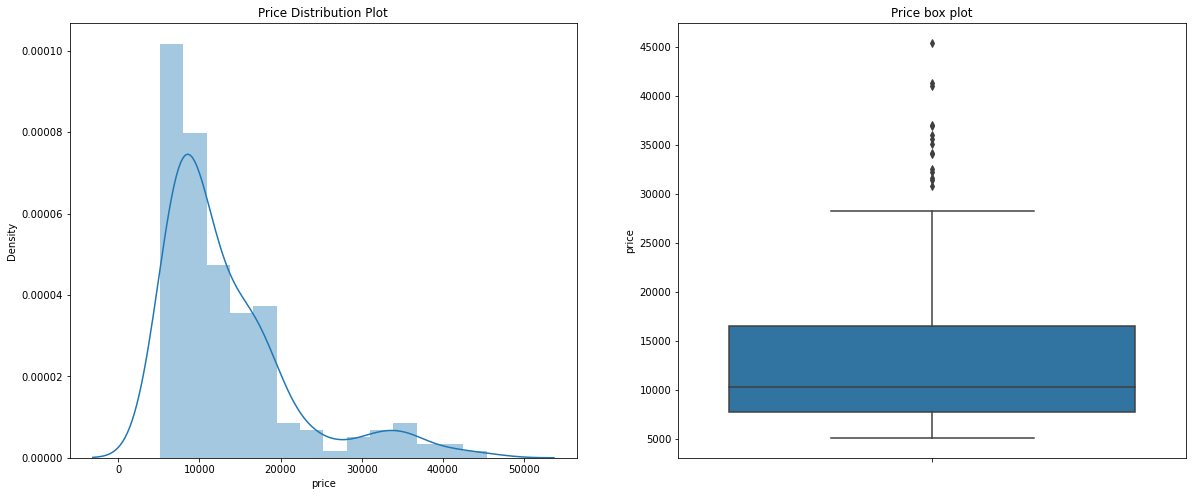

In [11]:
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
plt.title("Price Distribution Plot")
sns.distplot(cars["price"])

plt.subplot(1,2,2)
plt.title("Price box plot")
sns.boxplot(y=cars["price"])

plt.show()

In [12]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


#### Inference :

1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
2. There is a significant difference between the mean and the median of the price distribution.
3. The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

#### Step 3.1 : Visualising Categorical Data

    - CompanyName
    - Symboling
    - fueltype
    - enginetype
    - carbody
    - doornumber
    - enginelocation
    - fuelsystem
    - cylindernumber
    - aspiration
    - drivewheel

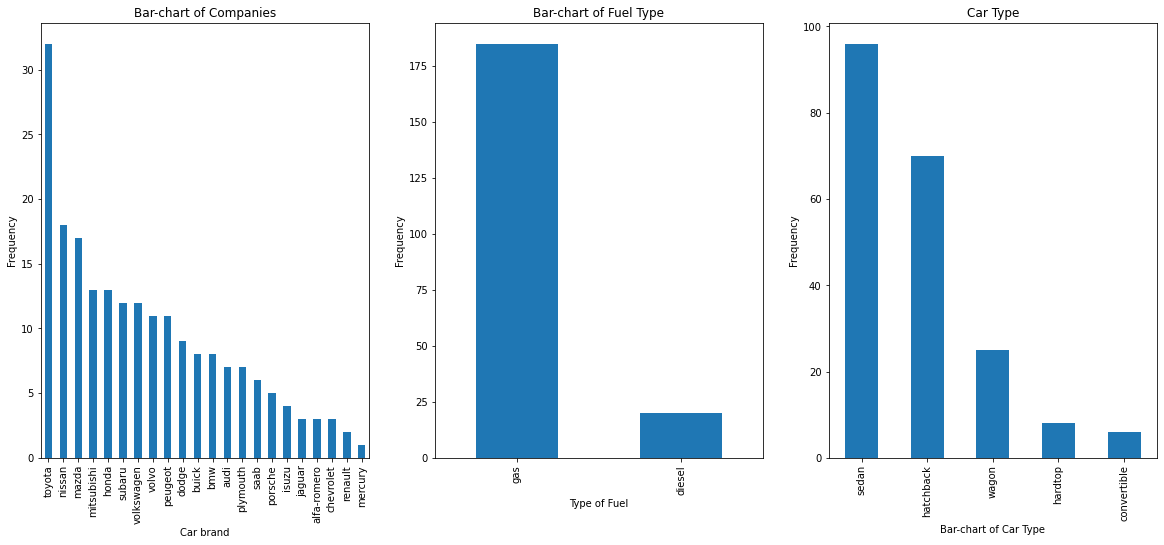

In [13]:
plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind = "bar")
plt.title("Bar-chart of Companies")
plt1.set(xlabel = "Car brand", ylabel = "Frequency")

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind = "bar")
plt.title("Bar-chart of Fuel Type")
plt1.set(xlabel = "Type of Fuel", ylabel = "Frequency")

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind = "bar")
plt.title("Car Type")
plt1.set(xlabel = "Bar-chart of Car Type", ylabel = "Frequency")

plt.show()

#### Inference :

1. `Toyota` seemed to be favored car company.
2. Number of `gas` fueled cars are more than `diesel`.
3. `sedan` is the top car type prefered.

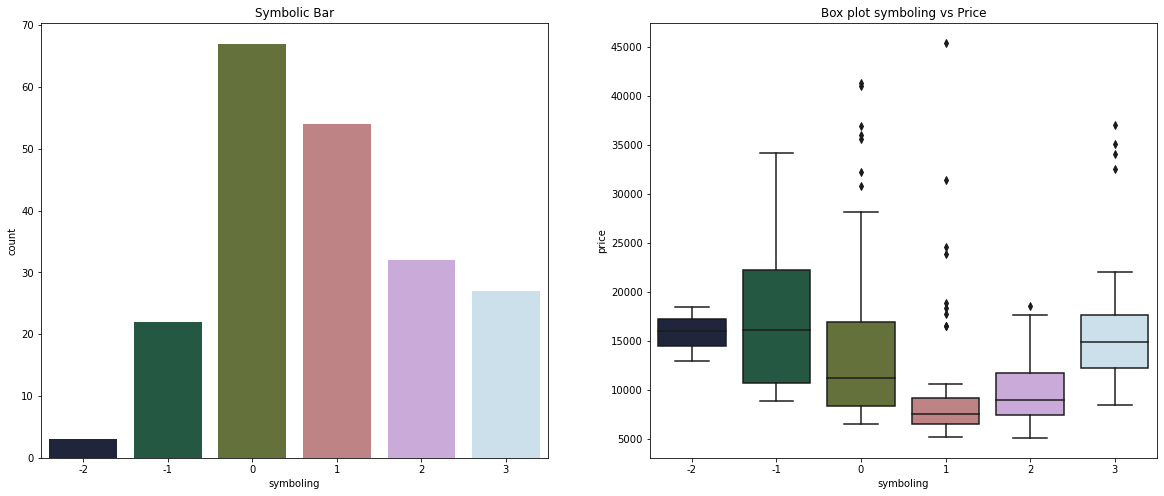

In [14]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Symbolic Bar")
sns.countplot(cars["symboling"], palette = "cubehelix")

plt.subplot(1,2,2)
plt.title("Box plot symboling vs Price")
sns.boxplot(y = cars["price"], x = cars["symboling"], palette = "cubehelix")

plt.show()

#### Inference :

1. It seems that the symboling with `0` and `1` values have high number of rows (i.e. They are most sold.)
2. The cars with `-1` symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with `3` value has the price range similar to `-2` value. There is a dip in price at symboling `1`.

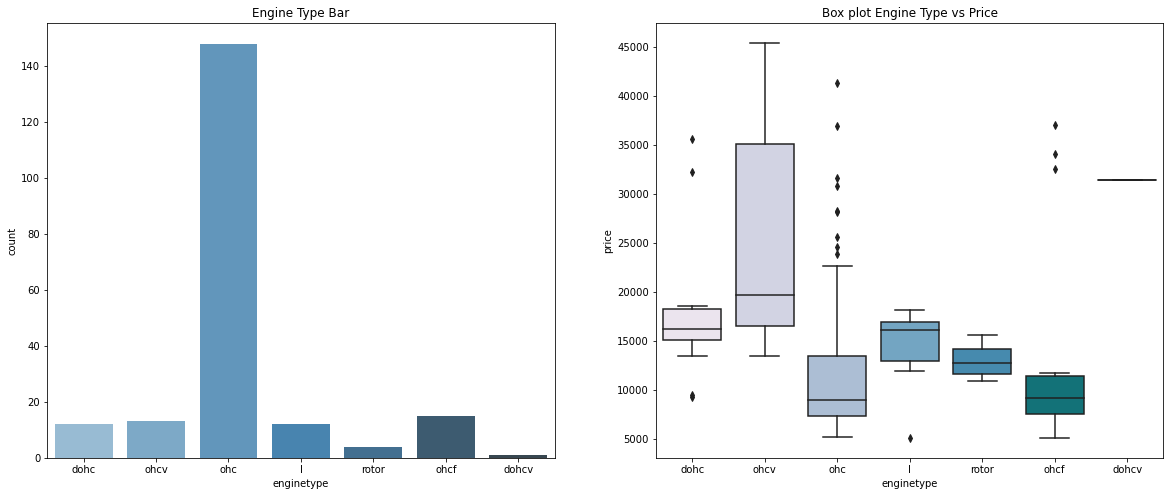

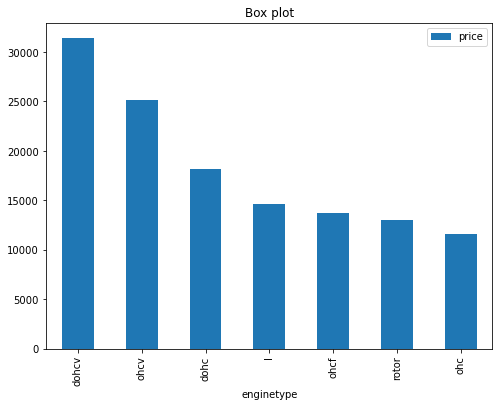

In [15]:
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
plt.title("Engine Type Bar")
sns.countplot(cars["enginetype"], palette = ("Blues_d"))

plt.subplot(1,2,2)
plt.title("Box plot Engine Type vs Price")
sns.boxplot(y = cars["price"], x = cars["enginetype"], palette = ("PuBuGn")) #fixed length keyworded argument

plt.show()

df = pd.DataFrame(cars.groupby(["enginetype"])["price"].mean().sort_values(ascending = False))
df.plot.bar(figsize =(8,6))
plt.title("Box plot")
plt.show()

#### Inference :

1. `ohc` Engine type seems to be most favored type.
2. `ohcv` has the highest price range (While `dohcv` has only one row), `ohc` and `ohcf` have the low price range.

<Figure size 1440x576 with 0 Axes>

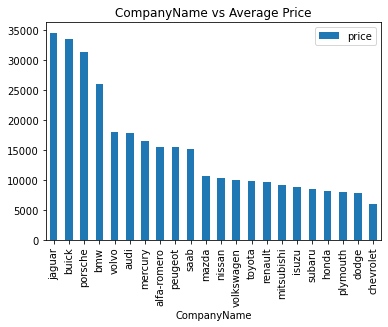

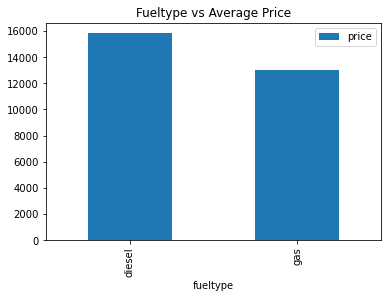

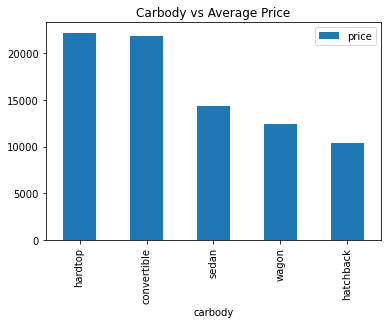

In [16]:
#CompanyName, fueltype, carbody vs Average price

plt.figure(figsize = (20,8))

df = pd.DataFrame(cars.groupby(["CompanyName"])["price"].mean().sort_values(ascending = False))
df.plot.bar()
plt.title("CompanyName vs Average Price")
plt.show()

df = pd.DataFrame(cars.groupby(["fueltype"])["price"].mean().sort_values(ascending = False))
df.plot.bar()
plt.title("Fueltype vs Average Price")
plt.show()

df = pd.DataFrame(cars.groupby(["carbody"])["price"].mean().sort_values(ascending = False))
df.plot.bar()
plt.title("Carbody vs Average Price")
plt.show()

#### Inference :

1. `Jaguar` and `Buick` seem to have highest average price.
2. `diesel` has higher average price than  gas.
3. `hardtop` and `convertible` have higher average price.

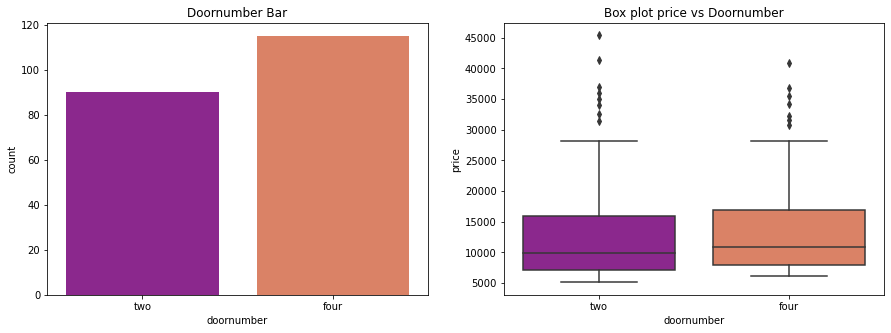

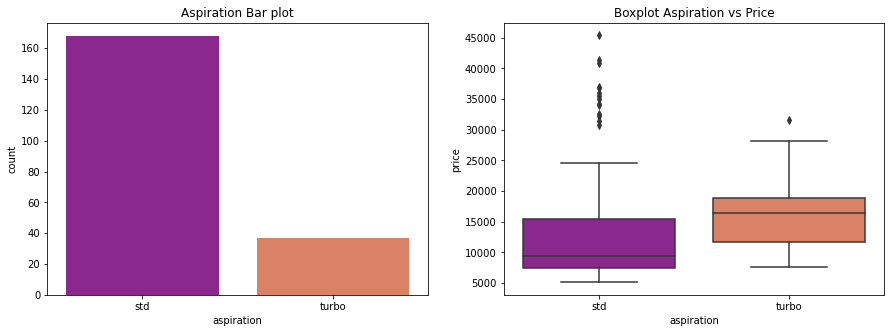

In [17]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(cars["doornumber"], palette = "plasma")
plt.title("Doornumber Bar")

plt.subplot(1,2,2)
sns.boxplot(y = cars["price"], x = cars["doornumber"], palette = "plasma")
plt.title("Box plot price vs Doornumber")

plt.show()

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(cars["aspiration"], palette = "plasma")
plt.title("Aspiration Bar plot")

plt.subplot(1,2,2)
sns.boxplot(y = cars["price"], x = cars["aspiration"], palette = "plasma")
plt.title("Boxplot Aspiration vs Price")

plt.show()


#### Inference :

1. `doornumber` variable is not affacting the price much. There is no significant difference between the categories in it.
2. It seems aspiration with `turbo` have higher price range than the `std`(though it has some high values outside the whiskers.)

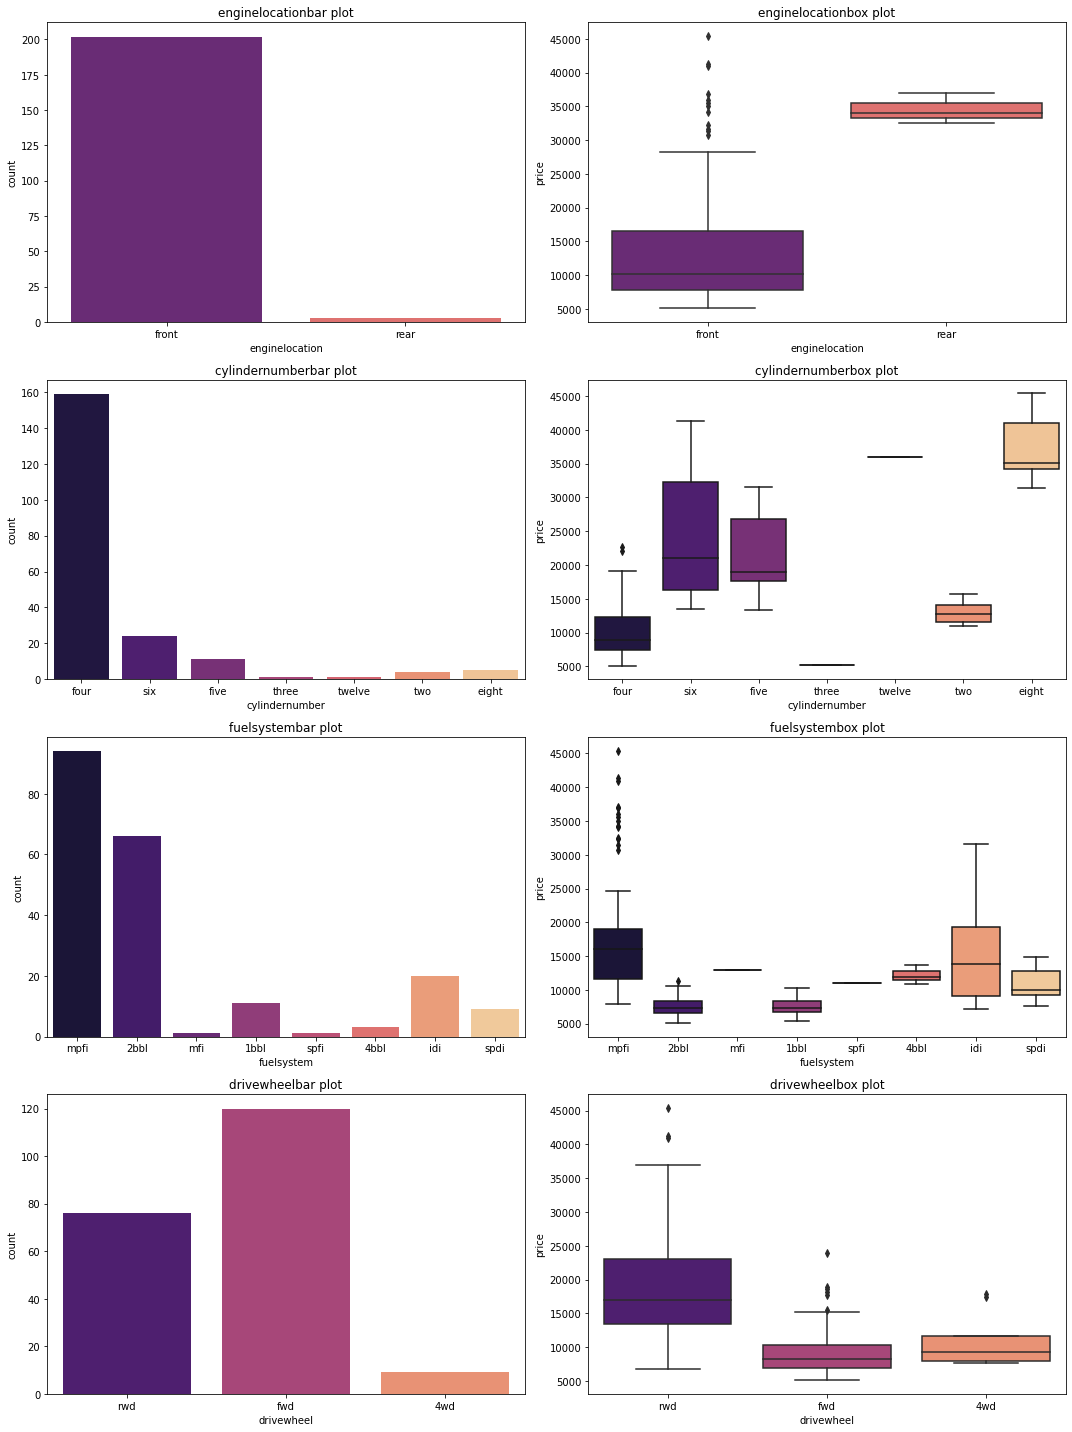

In [18]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+"bar plot")
    sns.countplot(cars[x], palette = ("magma"))
    plt.subplot(4,2,fig+1)
    plt.title(x+"box plot")
    sns.boxplot(y = cars["price"], x = cars[x], palette = ("magma"))
    
plt.figure(figsize = (15,20))

plot_count("enginelocation",1)
plot_count("cylindernumber",3)
plot_count("fuelsystem",5)
plot_count("drivewheel",7)

plt.tight_layout()

#### Inference :

1. Very few datapoints for `enginelocation` categories to make an inference.
2. Most common number of cylinders are `four`, `six` and `five`. Though `eight` cylinders have the highest price range.
3. `mpfi` and `2bbl` are most common type of fuel systems. `mpfi` and `idi` having the highest price range. But there are few data for other categories to derive any meaningful inference
4. A very significant difference in drivewheel category. Most high ranged cars seeme to prefer `rwd` drivewheel.

#### Step 3.2 : Visualising numerical data

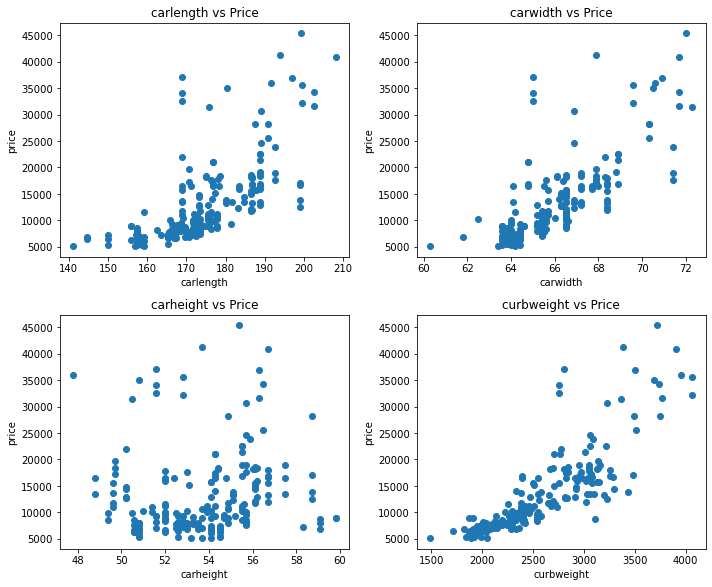

In [19]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars["price"])
    plt.title(x+" vs Price")
    plt.xlabel(x)
    plt.ylabel("price")
    
plt.figure(figsize = (10,20))

scatter("carlength",1)
scatter("carwidth",2)
scatter("carheight",3)
scatter("curbweight",4)

plt.tight_layout()

#### Inference :

1. `carwidth`, `carlength` and `curbweight` seems to have a poitive correlation with `price`. 
2. `carheight` doesn't show any significant trend with price.

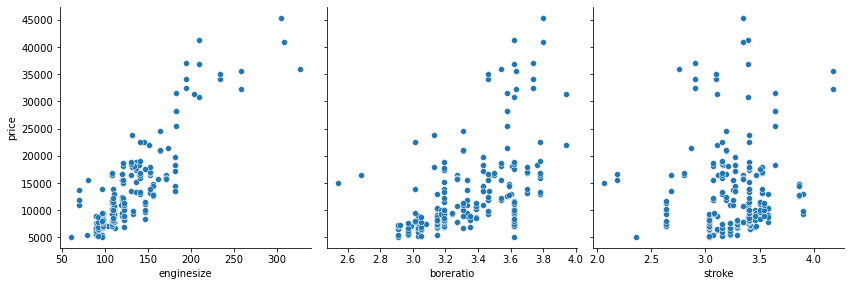

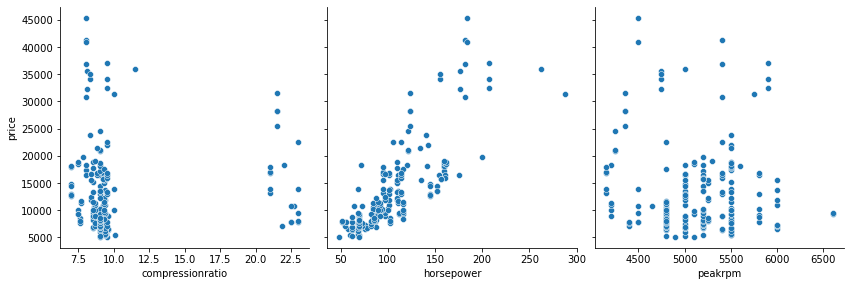

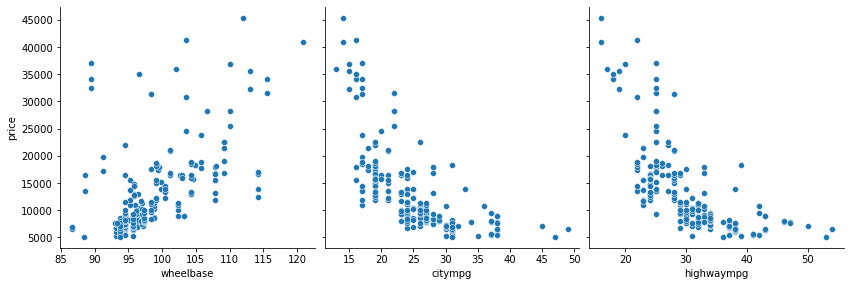

In [20]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars = [x,y,z], y_vars = "price", size = 4, aspect =1, kind = "scatter")
    plt.show()
    
pp("enginesize", "boreratio", "stroke")
pp("compressionratio", "horsepower", "peakrpm")
pp("wheelbase","citympg", "highwaympg")
    

#### Inference :

1. `enginesize`, `boreratio`, `horsepower`, `wheelbase` - seem to have a significant positive correlation with price.
2. `citympg`, `highwaympg` - seem to have a significant negative correlation with price.

In [21]:
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]

0.841118268481846

### Step 4 : Deriving new features

In [22]:
#Fuel economy
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

In [23]:
#Binning the Car Companies based on avg prices of each Company

cars["price"] = cars["price"].astype("int") #Converting price to int in the original dataframe
temp = cars.copy() #creating a copy to not disturb original df
table = temp.groupby(["CompanyName"])["price"].mean()# creating table group by company names on price

temp = temp.merge(table.reset_index(), how = "left", on = "CompanyName")#Merging table to copy with left join on
# company name, index reset to price_y, original changes to price_x after merging finally

bins = [0,10000,20000,40000]
cars_bin = ["Budget", "Medium-range", "High-end"]

cars["pricerange"] = pd.cut(temp["price_y"],bins,labels = cars_bin, right = False)#cutting temp on price_y, binning, 
# applying label, right = False, includes the right most binned value (1,2], (2,3]

cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,pricerange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium-range
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium-range
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium-range
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium-range
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium-range


In [24]:
table

CompanyName
alfa-romero    15498.333333
audi           17859.142857
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.250000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
nissan         10415.666667
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.400000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64

In [25]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [26]:
temp

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_x,fueleconomy,price_y
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495,23.70,15498.333333
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500,23.70,15498.333333
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500,22.15,15498.333333
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950,26.70,17859.142857
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450,19.80,17859.142857
5,6,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250,21.70,17859.142857
6,7,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710,21.70,17859.142857
7,8,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920,21.70,17859.142857
8,9,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875,18.35,17859.142857
9,10,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859,18.70,17859.142857


### Step 5 : Bivariate Analysis

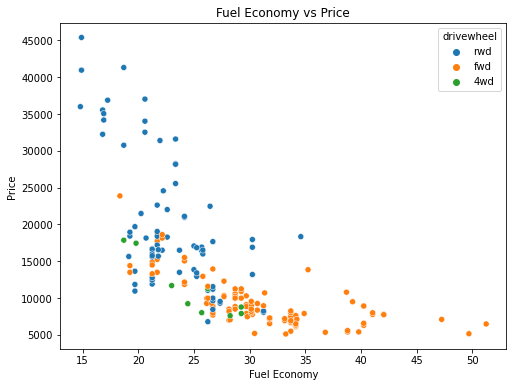

<Figure size 432x288 with 0 Axes>

In [27]:
plt.figure(figsize = (8,6))

plt.title("Fuel Economy vs Price")
sns.scatterplot(x = cars["fueleconomy"], y = cars["price"], hue = cars["drivewheel"])
plt.xlabel("Fuel Economy")
plt.ylabel("Price")

plt.show()
plt.tight_layout()

#### Inference :

1. `fueleconomy` has an obvios `negative correlation` with price and is significant.

<Figure size 3960x1440 with 0 Axes>

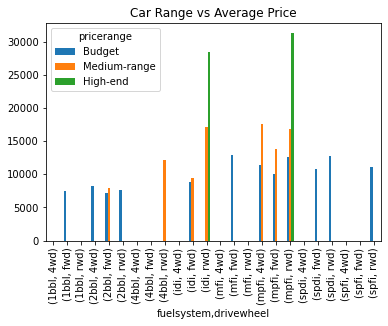

In [29]:
plt.figure(figsize=(55, 20))

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','pricerange'])['price'].mean().unstack(fill_value = 0))
#unstack returns a DF having new column labels, whose inner most level consists of pivoted index labels
# fill_value is 0 means - Replace NaN with 0 if unstack produces missing values
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

#### Inference :

1. High ranged cars prefer `rwd` drivewheel with `idi` or `mpfi` fuelsystem.

### List of significant variables after Visual analysis :

    - Car Range 
    - Engine Type 
    - Fuel type 
    - Car Body 
    - Aspiration 
    - Cylinder Number 
    - Drivewheel 
    - Curbweight 
    - Car Length
    - Car width
    - Engine Size 
    - Boreratio 
    - Horse Power 
    - Wheel base 
    - Fuel Economy 

In [30]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'pricerange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,pricerange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium-range
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium-range
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium-range
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium-range
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium-range


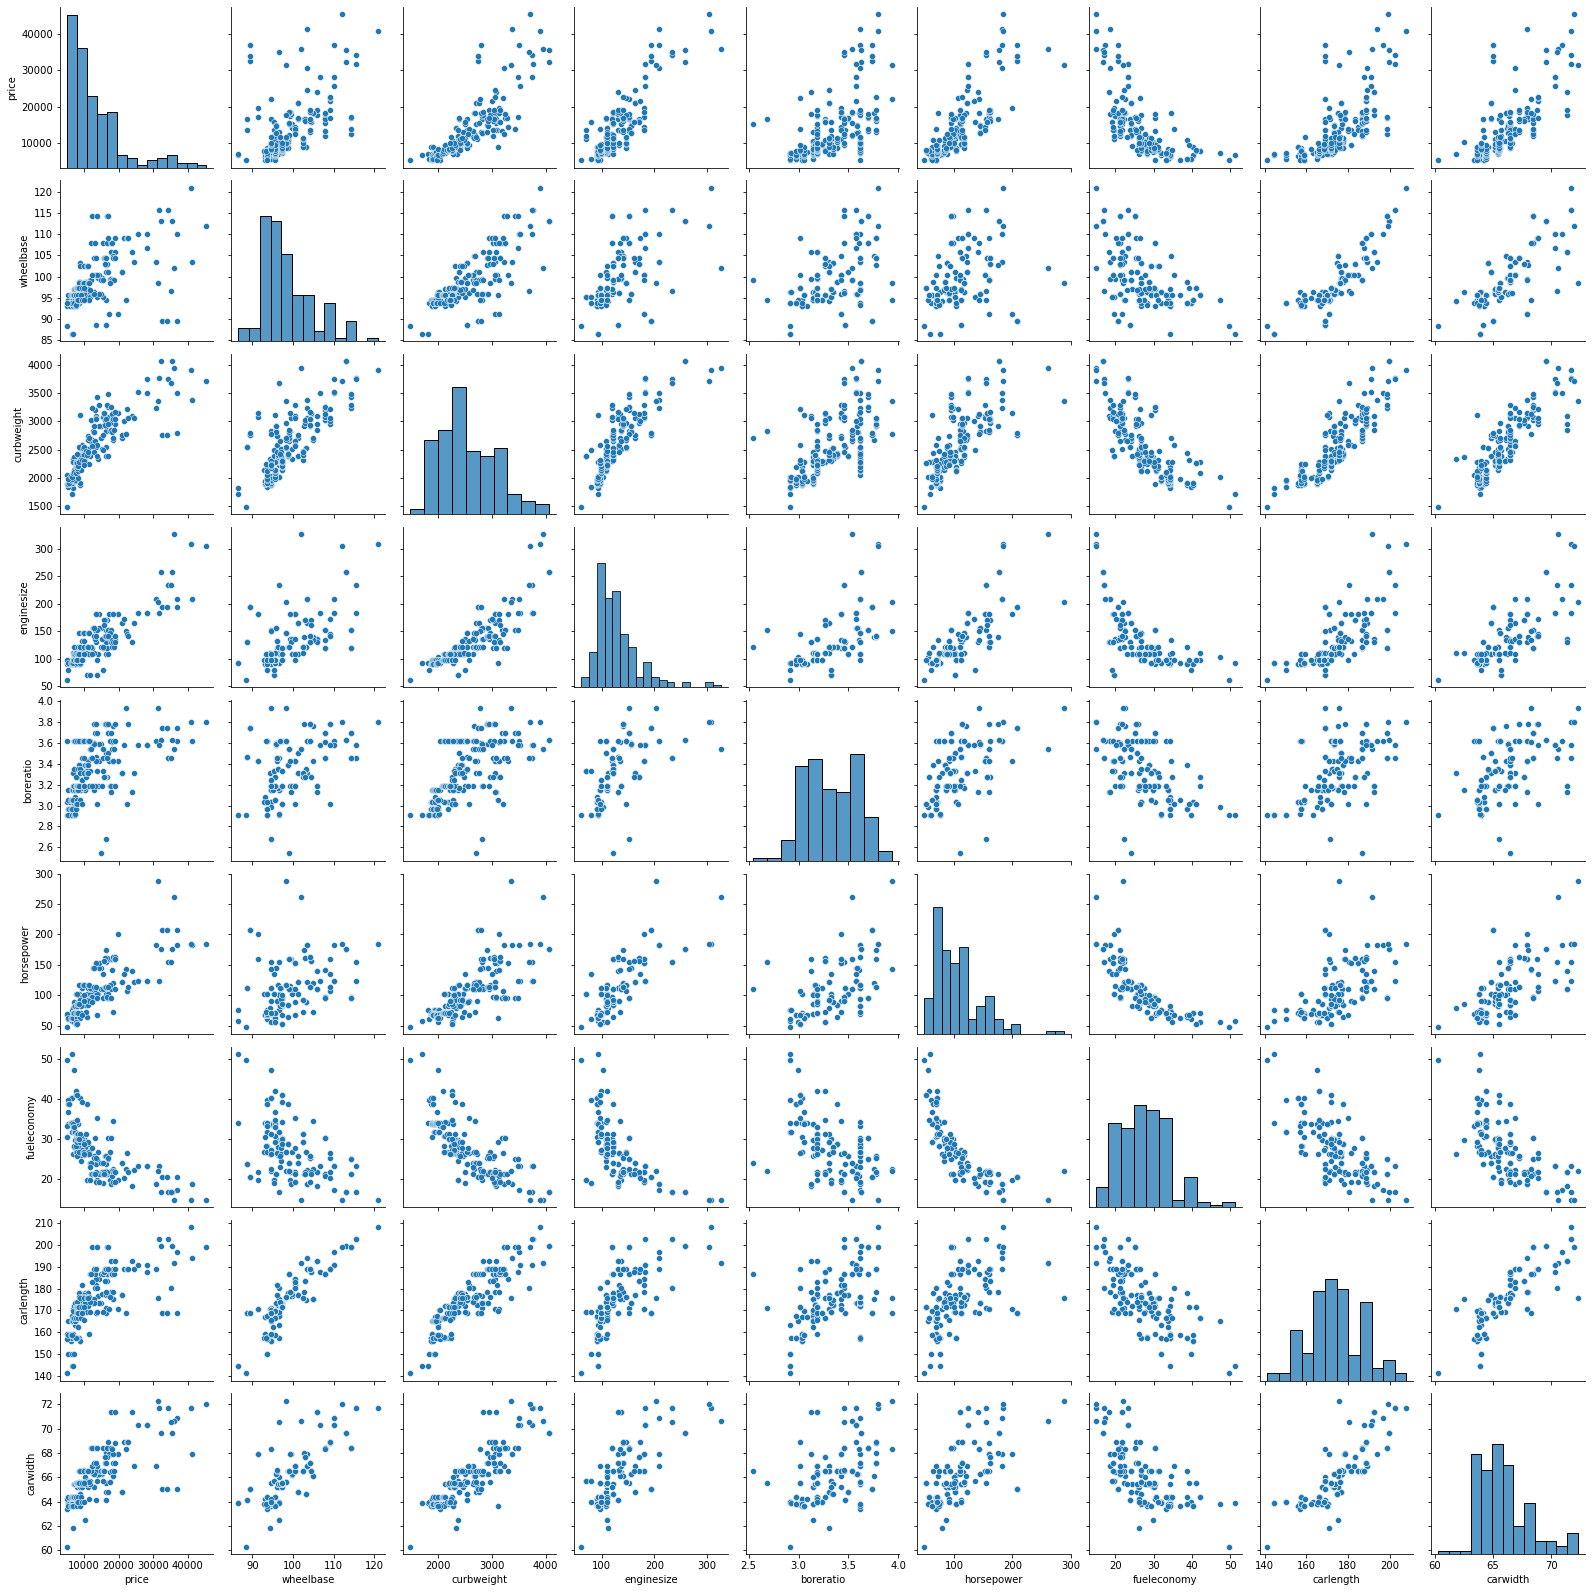

In [31]:
sns.pairplot(cars_lr)
plt.show()

### Step 6 : Dummy Variables

In [32]:
# Defining the map function
def dummies(x, df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('pricerange',cars_lr)

In [45]:
cars_lr

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium-range,High-end
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
5,15250,99.8,2507,136,3.19,110,21.70,177.3,66.3,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
6,17710,105.8,2844,136,3.19,110,21.70,192.7,71.4,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
7,18920,105.8,2954,136,3.19,110,21.70,192.7,71.4,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
8,23875,105.8,3086,131,3.13,140,18.35,192.7,71.4,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
9,17859,99.5,3053,131,3.13,160,18.70,178.2,67.9,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [34]:
cars_lr.shape

(205, 31)

### Step 7 : Train-Test Split and feature scaling

In [35]:
from sklearn.model_selection import train_test_split

np.random.seed(0) #Same set of numbers will be taken every time
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [37]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium-range,High-end
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [38]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium-range,High-end
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.909091,0.181818,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.288490,0.387050,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


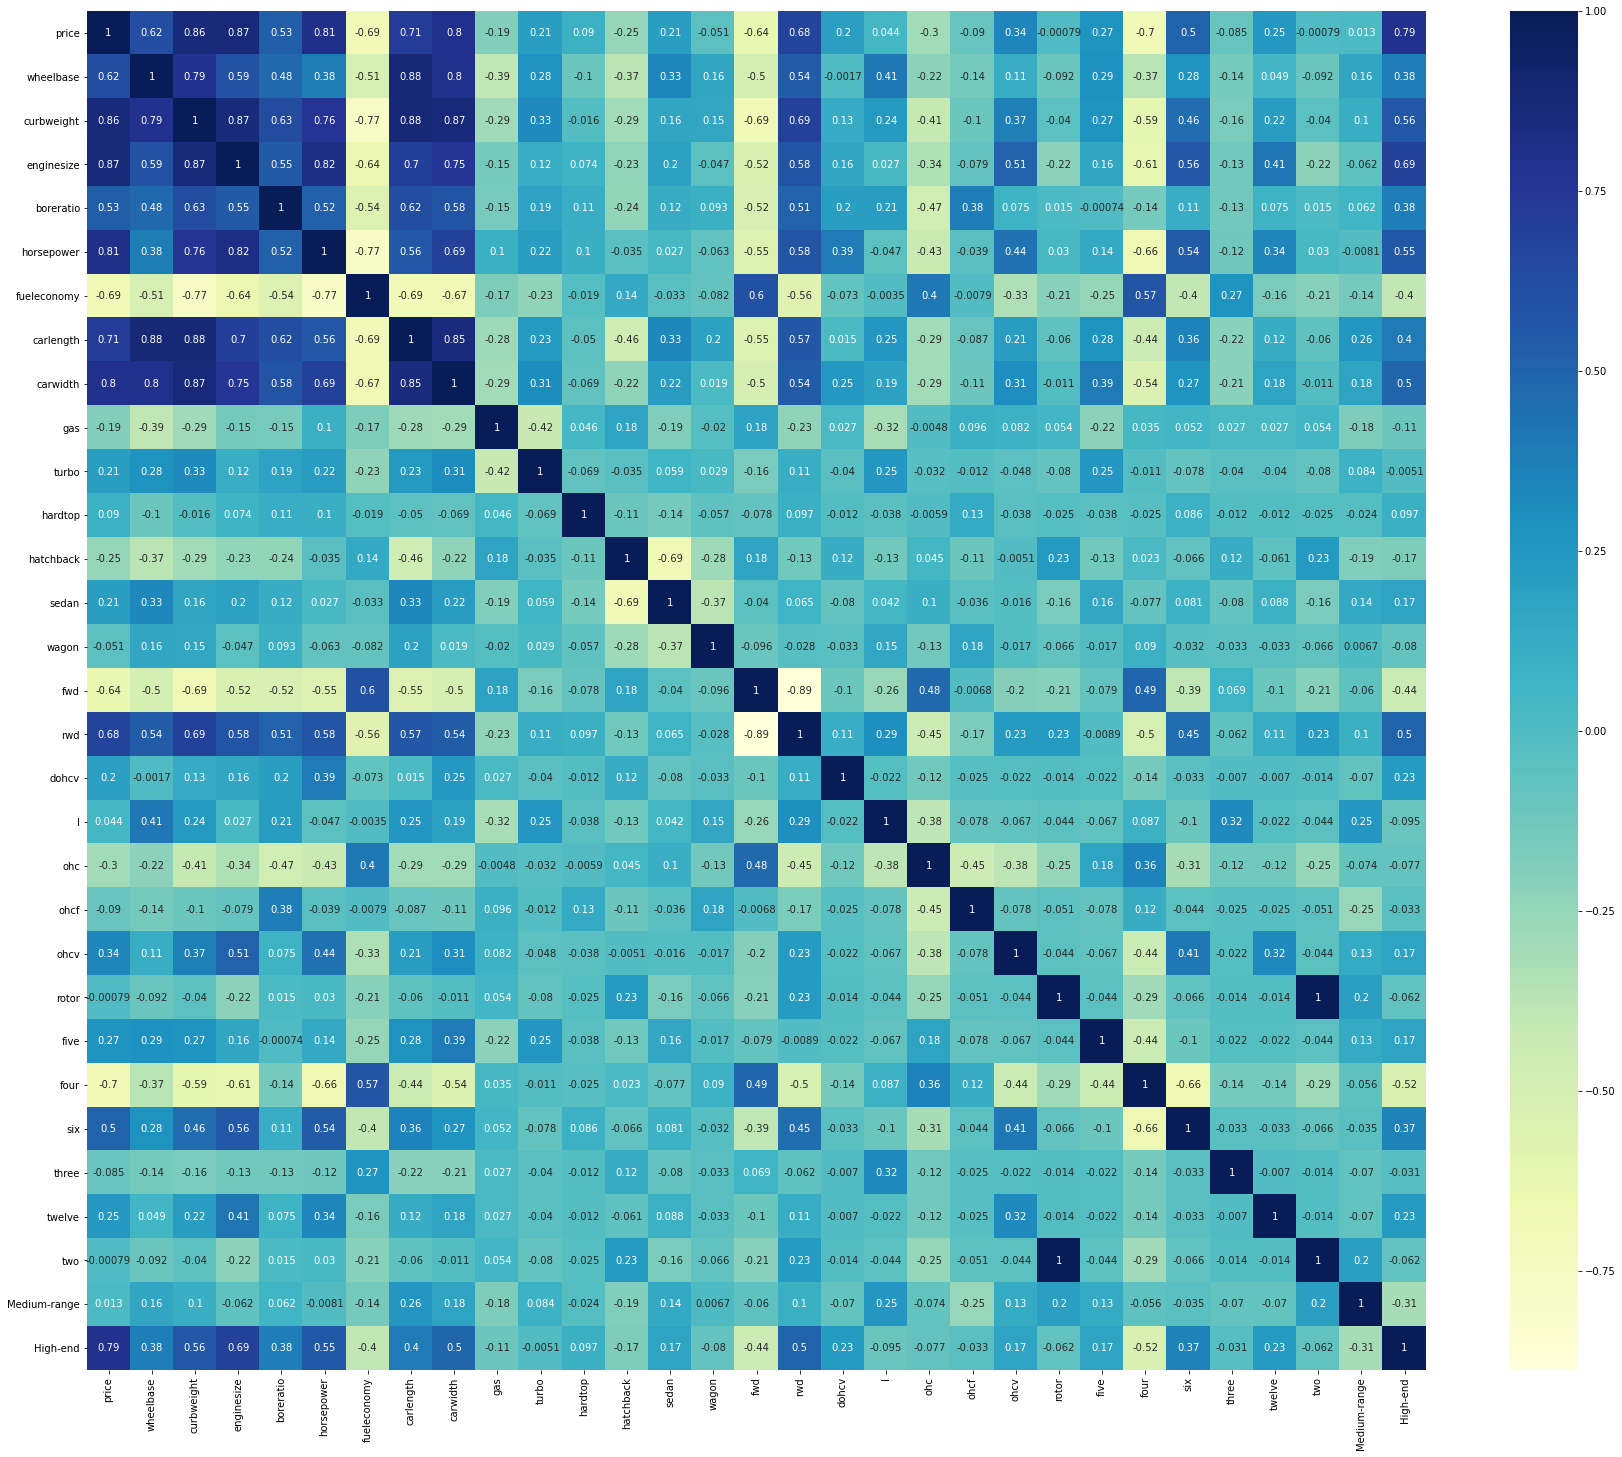

In [40]:
#Correlation using heatmap
plt.figure(figsize = (30,25))
sns.heatmap(df_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

Highly correlated variables to price are - `curbweight`, `enginesize`, `horsepower`,`carwidth` and `highend`.

In [41]:
#Dividing data into X and y variables
y_train = df_train.pop('price') # returns the popped feature after deleting it from the dataframe
X_train = df_train

### Step 8 : Model Building

In [42]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10) #Instantiation, we want 10 features initially
rfe = rfe.fit(X_train, y_train)
# Given an external estimator that assigns weights to features. Ex - coefficient of linear model or slope
#  the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and 
# smaller sets of features. First, the estimator is trained on the initial set of features and the importance of 
# each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned 
# from current set of features. That procedure is recursively repeated on the pruned set until the desired 
# number of features to select is eventually reached.

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
# rfe,support_ indices bool, default=False, 
#If True, the return value will be an array of integers, rather than a boolean mask.

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 21),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 20),
 ('Medium-range', False, 12),
 ('High-end', True, 1)]

In [46]:
X_train.columns[rfe.support_] # All true with rank 1

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'High-end'],
      dtype='object')

In [48]:
X_train

,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium-range,High-end
122,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
190,0.272414,0.284329,0.181132,0.404762,0.175000,0.314129,0.400000,0.308333,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
96,0.272414,0.187355,0.135849,0.373016,0.087500,0.518519,0.393496,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
177,0.544828,0.376261,0.230189,0.500000,0.183333,0.396433,0.560976,0.516667,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
181,0.617241,0.645074,0.377358,0.468254,0.450000,0.176955,0.759350,0.516667,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
97,0.272414,0.212956,0.135849,0.373016,0.087500,0.518519,0.473171,0.291667,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


#### Building model using statsmodel, for the detailed statistics

In [47]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,fueleconomy,carwidth,hatchback,sedan,wagon,dohcv,twelve,High-end
122,0.272692,0.083333,0.530864,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.213992,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.344307,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.122085,0.575000,0,0,1,0,0,0


In [49]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model, y first then x here
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### MODEL 1

In [50]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.29e-70
Time:                        22:03:24   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0947      0.042     -2.243      

p-vale of `twelve` seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [51]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

#### MODEL 2

In [52]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           4.25e-71
Time:                        22:22:20   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0764      0.041     -1.851      

In [53]:
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)

#### MODEL 3

In [54]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           7.85e-72
Time:                        22:22:30   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [55]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,26.90
1,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
6,wagon,3.58
8,High-end,1.63
7,dohcv,1.46


dropping `curbweight` because of high VIF value. (shows that curbweight has high multicollinearity.)

In [56]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

#### MODEL 4


In [57]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           4.70e-70
Time:                        22:22:48   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [58]:
checkVIF(X_train_new)

,Features,VIF
0,const,26.89
4,sedan,6.06
3,hatchback,5.54
5,wagon,3.47
1,horsepower,2.50
2,carwidth,2.22
7,High-end,1.56
6,dohcv,1.21


dropping `sedan` because of high VIF value.

In [59]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

#### MODEL 5

In [60]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.68e-69
Time:                        22:23:00   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [61]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.82
1,horsepower,2.39
2,carwidth,2.09
6,High-end,1.55
3,hatchback,1.23
5,dohcv,1.21
4,wagon,1.11


dropping `wagon` because of high p-value.

In [62]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)

#### MODEL 6

In [63]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.57e-70
Time:                        22:23:12   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [64]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.39
1,horsepower,2.39
2,carwidth,2.08
5,High-end,1.53
4,dohcv,1.21
3,hatchback,1.13


#### MODEL 7

In [65]:
#Dropping dohcv to see the changes in model statistics
X_train_new = X_train_new.drop(["dohcv"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.04e-67
Time:                        22:23:27   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

,Features,VIF
0,const,10.04
1,horsepower,2.22
2,carwidth,2.08
4,High-end,1.53
3,hatchback,1.10


### Step 9 : Residual Analysis of Model

In [66]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

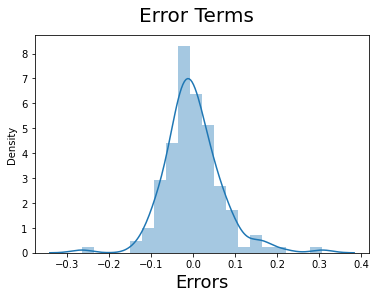

In [67]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

### Step 10 : Prediction and Evaluation

In [68]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [69]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [70]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [71]:
# Making predictions
y_pred = lm.predict(X_test_new)

#### Evaluation of test via comparison of y_pred and y_test

In [72]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8614595209022036

Text(0, 0.5, 'y_pred')

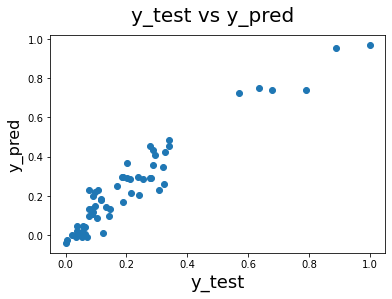

In [73]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

#### Evaluation of the model using Statistics

In [74]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.04e-67
Time:                        22:24:57   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

#### Inference :

1. *R-sqaured and Adjusted R-squared (extent of fit)* - 0.899 and 0.896 - `90%` variance explained.
2. *F-stats and Prob(F-stats) (overall model fit)* - 308.0 and 1.04e-67(approx. 0.0) - Model fir is significant and explained `90%` variance is just not by chance.
3. *p-values* - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.